In [76]:
import math
import numpy as np
import matplotlib.pyplot as plt

 
np.random.seed(10000)  #for the sample to be reproducible
    
#Setting parameters

S0 = 100       
K = 99          
sigma = 0.2      
r = 0.06                      
M = 100000         
T=1
N=50
dt = T / N


# Monte-carlo simulation with M independent paths and N time steps
def valueOption(S0, r, sigma, K, M, N, T): 
    S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt
    + sigma * np.sqrt(dt)
    * np.random.standard_normal((N + 1, M)), axis=0))
    S[0] = S0

    # Calculating the Monte Carlo estimator
    V0 = np.exp(-r * T) * np.sum(np.maximum(K-S[-1], 0)) / M
    return V0

put_option_value=valueOption(S0, r, sigma, K, M, N,T)

print('The European put option value is', put_option_value)

The European put option value is 4.79708572093927


In [77]:
#True value based on Black-Scholes model
import numpy as np
from math import log, sqrt, exp
from scipy.stats import norm

Sigma = 0.2
S = 100
T = 1
N = 50
r = 0.06
K = 99

# black scholes theoretical value
def d1(Stockprice, vol):
    return (log(Stockprice / K) + (r + vol ** 2 / 2) * T) / (vol * sqrt(T))


def d2(Stockprice, vol):
    return d1(Stockprice, vol) - vol * sqrt(T)


def bs_call(Stockprice, vol):
    BS_delta = norm.cdf(-d1(Stockprice, vol))
    Claim =  K * exp(-r * T) * norm.cdf(-d2(Stockprice, vol)) - Stockprice * BS_delta 
    return BS_delta, Claim


BS_delta, Claim_BS = bs_call(S, Sigma)
print('The European put option value determined from Black Scholes is: ', Claim_BS)

The European put option value determined from Black Scholes is:  4.778969051891707


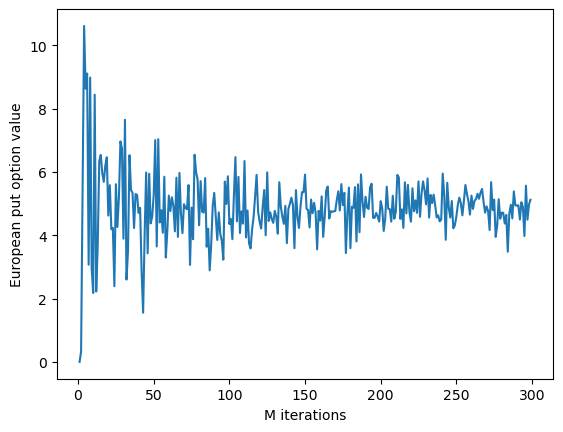

In [78]:
M_grid = [i for i in range(1,300)]
C_grid = np.zeros(len(M_grid))
for i in range(len(M_grid)):
    C_grid[i] = valueOption(S0, r, sigma, K, M_grid[i], N, T)


plt.plot(M_grid, C_grid, label='Graph of estimations given M')
plt.xlabel('M iterations')
plt.ylabel('European put option value')
plt.show()

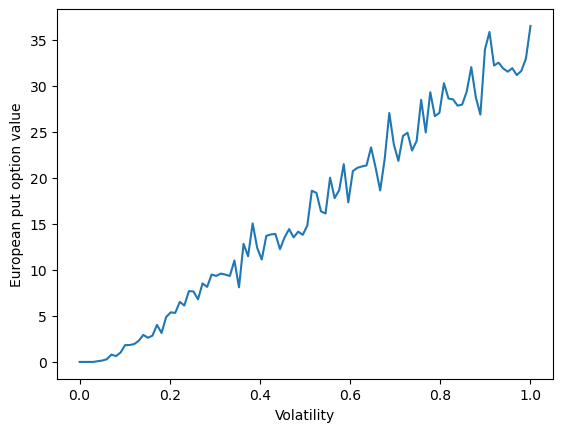

In [79]:
import math
import numpy as np
import matplotlib.pyplot as plt

 
np.random.seed(1000)  #for the sample to be reproducible
    
#Setting parameters

S0 = 100       
K = 99          
sigma = 0.2      
r = 0.06                      
M = 200
T=1
N=50
dt = T / N


# Monte-carlo simulation with M paths and N time steps

def valueOption(S0, r, sigma, K, M, N, T): 
    S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt
    + sigma * np.sqrt(dt)
    * np.random.standard_normal((N + 1, M)), axis=0))
    S[0] = S0

    # Calculating the Monte Carlo estimator
    V0 = np.exp(-r * T) * np.sum(np.maximum(K-S[-1], 0)) / M
    return V0


sigma_grid = np.linspace(0,1,100)
C_grid = np.zeros(len(sigma_grid))
for i in range(len(sigma_grid)):
    C_grid[i] = valueOption(S0, r, sigma_grid[i], K, M, N, T)


plt.plot(sigma_grid, C_grid)
plt.xlabel('Volatility')
plt.ylabel('European put option value')
plt.show()

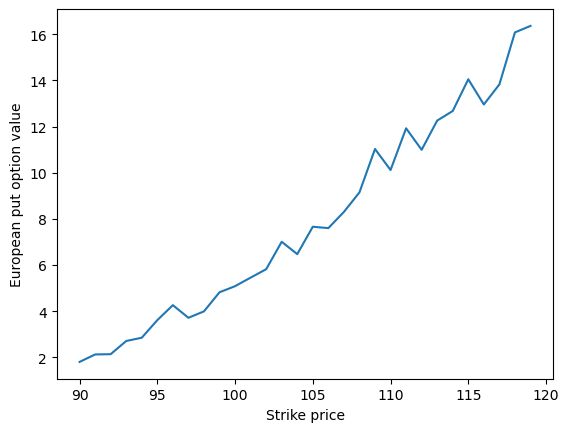

In [80]:
K_grid = [i for i in range(90,120)]
C_grid = np.zeros(len(K_grid))
for i in range(len(K_grid)):
    C_grid[i] = valueOption(S0, r, sigma, K_grid[i], M, N, T)




plt.plot(K_grid, C_grid, label='Graph of estimations given different strike prices')
plt.xlabel('Strike price')
plt.ylabel('European put option value')
plt.show()

In [81]:
import math
import numpy as np
import matplotlib.pyplot as plt

 
np.random.seed(10000)  #for the sample to be reproducible
    
#Setting parameters

S0 = 100       
K = 99          
sigma = 0.2      
r = 0.06                      
M = 100000         
T=1
N=50
dt = T / N
payoff=0

# Monte-carlo simulation with M independent paths and N time steps
def valueOption(S0, r, sigma, K, M, N, T): 
    S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt
    + sigma * np.sqrt(dt)
    * np.random.standard_normal((N + 1, M)), axis=0))
    S[0] = S0 
    payoff=np.maximum(K-S[-1], 0)
    # Calculating the Monte Carlo estimator
    V0 = np.exp(-r * T) * np.sum(np.maximum(K-S[-1], 0)) / M
    return V0, payoff

V0, payoff=valueOption(S0, r, sigma, K, M, N,T)
SE=np.std(payoff)/np.sqrt(M)

print("European Put option value is {0} with standard error {1}".
      format(V0,SE))

European Put option value is 4.79708572093927 with standard error 0.02692002469134959
